# Übungsblatt 10

Lernziele:
- Normierung von Datensätzen


In [1]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

# scatter plot data
def plot(X,y):
    
    # setup marker generator and color map
    markers = ('s', 'X', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend(loc='upper left')

    plt.tight_layout()

    plt.show()

Schritt 1: Lesen Sie die Daten aus 'data/2d_samples.csv' ein!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/2d_samples.csv")
df.head()

,x1,x2,Label
0,30.5905,11.30740,A
1,28.6456,10.42340,A
2,28.2756,10.18550,A
3,25.9744,8.50403,A
4,28.5634,10.92670,A


Schritt 2: Plotten Sie die Stichprobe mit unveränderten Merkmalen **x1** und **x2**!

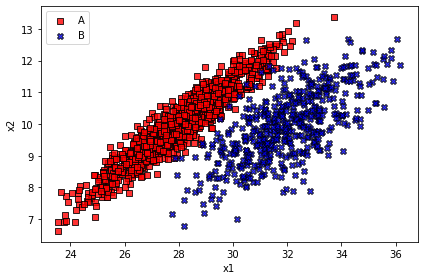

In [4]:
plot(df[["x1", "x2"]].values, df["Label"].values)

Schritt 3: Skalieren Sie die Merkmale auf den Bereich [0,1] und plotten Sie das Ergebnis

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[["x1", "x2"]].values)
x_scaled

array([[0.55755888, 0.69425989],
       [0.40369143, 0.56318604],
       [0.37441951, 0.52791176],
       ...,
       [0.62892699, 0.48685777],
       [0.34022674, 0.34066447],
       [0.73858593, 0.53565164]])

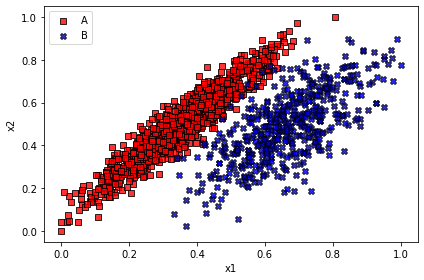

In [7]:
plot(x_scaled, df["Label"])

Schritt 4: Skalieren Sie die Muster, so dass sie den Mittelwert [0,0] und Varianz[1,1] haben und plotten Sie das Ergebnis.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
std_scaler = StandardScaler()
x_std_scaled = std_scaler.fit_transform(df[["x1", "x2"]].values)
x_std_scaled

array([[ 0.51644114,  1.18859823],
       [-0.26949073,  0.39963332],
       [-0.41900731,  0.18730894],
       ...,
       [ 0.88097872, -0.05980487],
       [-0.59365883, -0.93977742],
       [ 1.44110015,  0.23389714]])

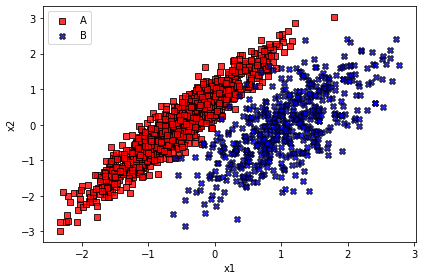

In [10]:
plot(x_std_scaled, df["Label"])

Schritt 5: Lesen Sie die Daten aus 'data/2d_samples_corrupted.csv' ein!

In [11]:
df_corrupted = pd.read_csv("data/2d_samples_corrupted.csv")
df_corrupted.head()

,x1,x2,Label
0,130.5905,211.30740,A
1,30.5905,11.30740,A
2,28.6456,10.42340,A
3,28.2756,10.18550,A
4,25.9744,8.50403,A


Schritt 6: Plotten Sie diese Stichprobe ebenfalls! Was fällt auf?

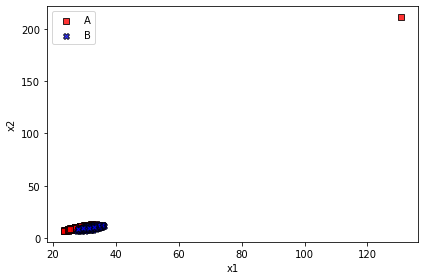

In [12]:
plot(df_corrupted[["x1", "x2"]].values, df_corrupted["Label"].values)

### Aufälligkeit: 
Großer Außreiser im 200er Bereich, sollte man am Besten aus dem weiteren Prozess rausnehmen/filtern.